In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

In [40]:
avocadoes = pd.read_csv("./avocado_data/avocado.csv")
avocadoes.head()
#avocadoes.info
avocadoes.max()

Unnamed: 0                    52
Date                  2018-03-25
AveragePrice                3.25
Total Volume         62505646.52
4046                 22743616.17
4225                 20470572.61
4770                  2546439.11
Total Bags           19373134.37
Small Bags            13384586.8
Large Bags            5719096.61
XLarge Bags            551693.65
type                     organic
year                        2018
region          WestTexNewMexico
dtype: object

In [4]:
avocadoes.dropna(inplace = True) #drops rows with n/a
avocadoes.drop_duplicates(inplace = True) #drops rows with duplicates
avocadoes = avocadoes.reset_index(drop = True) #resets indexes, makes all minor titles titles again

length = len(avocadoes.index) # length of entire array
length

18249

In [5]:
print(avocadoes.index)

RangeIndex(start=0, stop=18249, step=1)


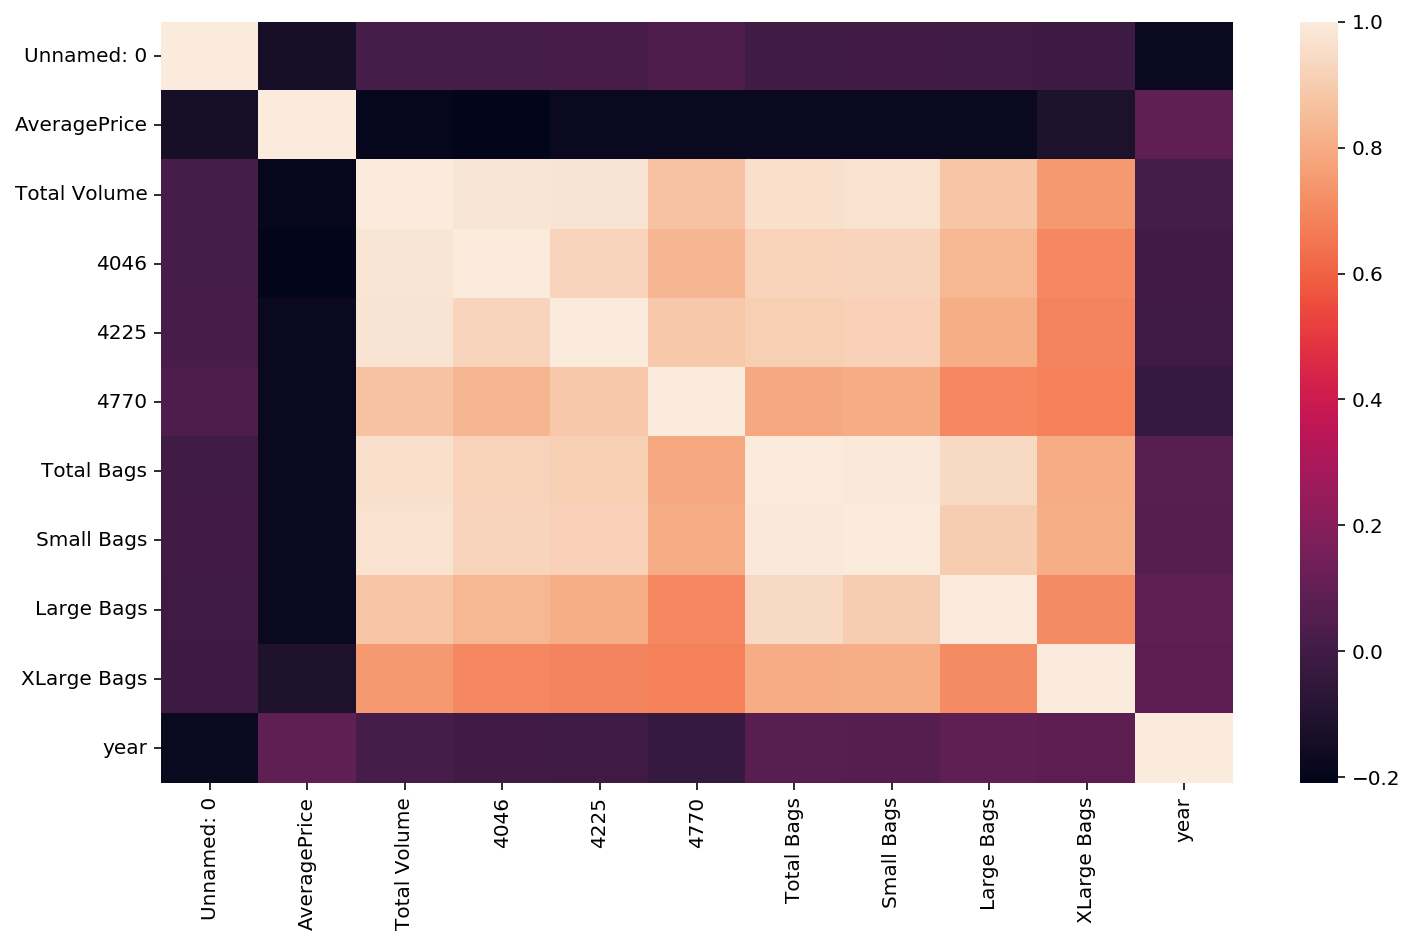

In [6]:
sns.heatmap(avocadoes.corr())

In [7]:
#Imma do relationship between number of smol bags and total volume of avocadoes
x = avocadoes["Small Bags"].to_numpy()
y = avocadoes["Total Volume"].to_numpy()

In [8]:
if x.shape[0] != y.shape[0]: #checks to see if same size
    print("Haha loser")
else:
    print("You not a loser, not missing any data")

You not a loser, not missing any data


In [9]:
mix = np.arange(length) #arange first generates a sequence in acending order up to that number, then makes even spaces between values in that sequence, length is list of all the numbers (their order)
np.random.shuffle(mix)

print(mix)

[13952  5956 17160 ...  9997  4074 16361]


In [11]:
split_data = int(length*0.8)
train = mix[:split_data]
test = mix[split_data:]
#learn

In [12]:
x_train, y_train = x[train], y[train] #x[train] basically takes all the values of x that have an index of train, so if train = 4216, x[4216] is in x
x_test, y_test = x[test], y[test]
x_train = x_train.reshape(-1,1) #rows, then columns
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

<function matplotlib.pyplot.show(*args, **kw)>

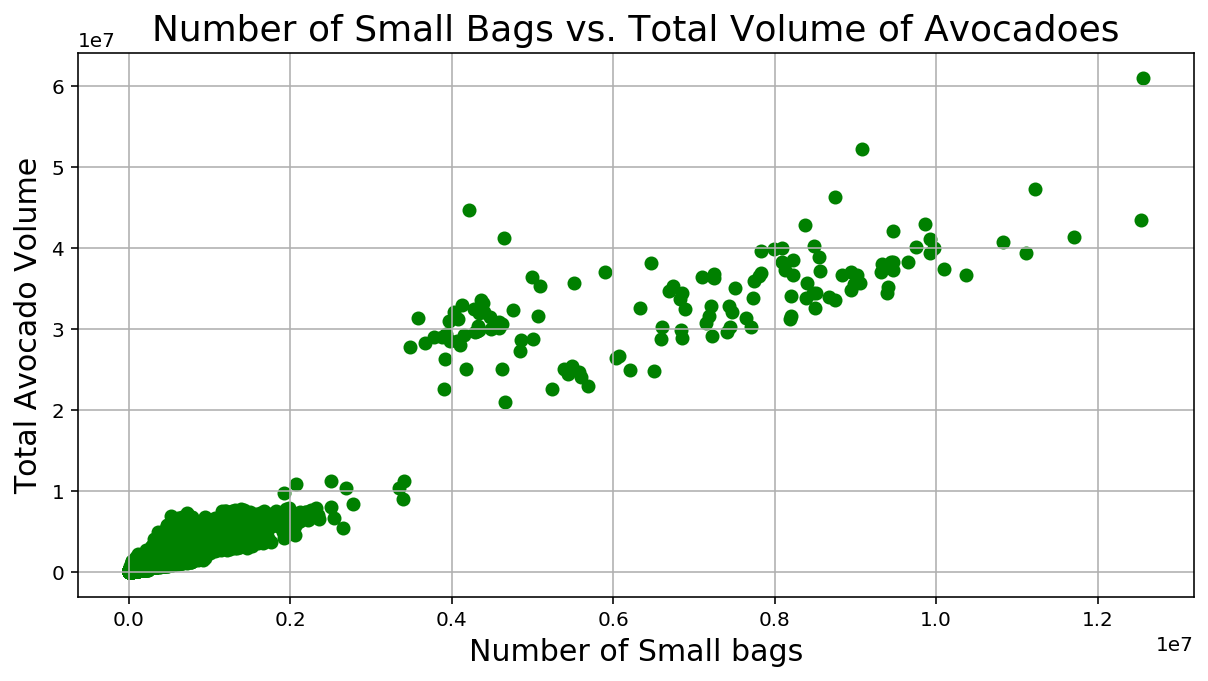

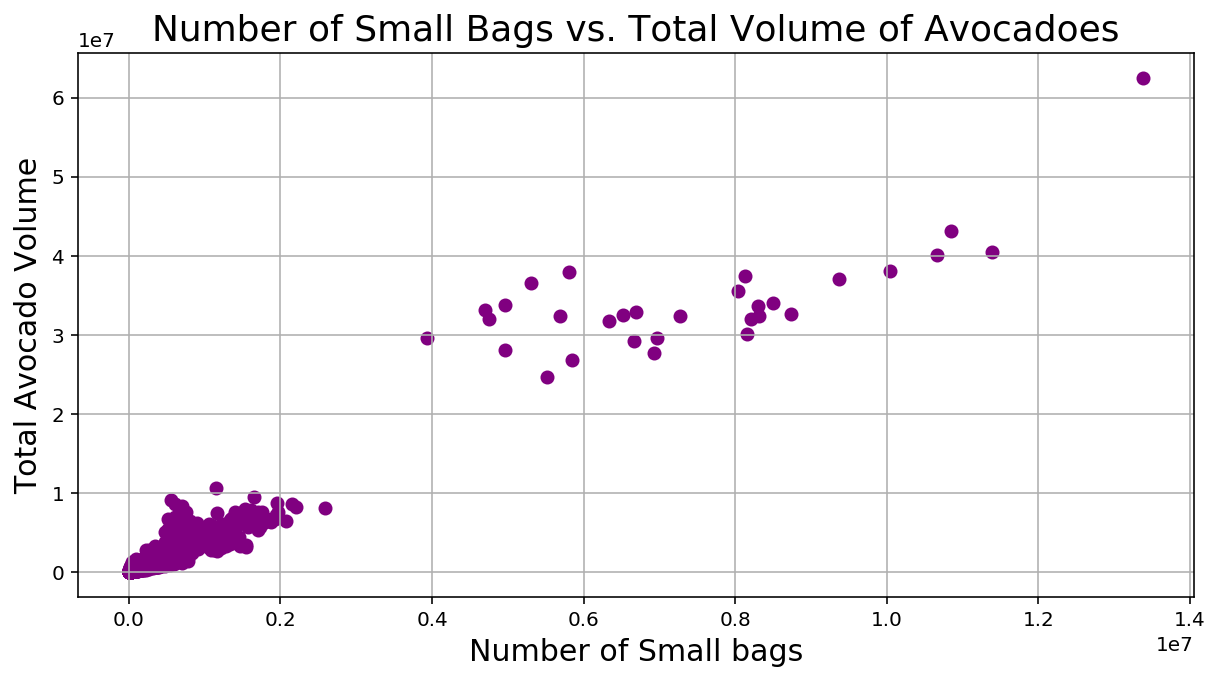

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,1,1) #change size of plot
plt.scatter(x_train, y_train, c = "Green")
#plt.xlim(-1, 10000)
#plt.ylim(-1, 100000)
plt.title("Number of Small Bags vs. Total Volume of Avocadoes", fontsize = "18")
plt.xlabel("Number of Small bags",fontsize = "15")
plt.ylabel("Total Avocado Volume", fontsize = "15")
plt.grid("on")
plt.show

plt.figure(figsize = (10,5))

plt.subplot(1,1,1) #change size of plot

plt.scatter(x_test, y_test, c = "Purple")
plt.title("Number of Small Bags vs. Total Volume of Avocadoes", fontsize = "18")
plt.xlabel("Number of Small bags",fontsize = "15")
plt.ylabel("Total Avocado Volume", fontsize = "15")
plt.grid("on")
plt.show



In [14]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression() #calls linear regression function
linear.fit(x_train, y_train)
print(linear.intercept_, linear.coef_[0])

[30431.97326118] [4.50426691]


<function matplotlib.pyplot.show(*args, **kw)>

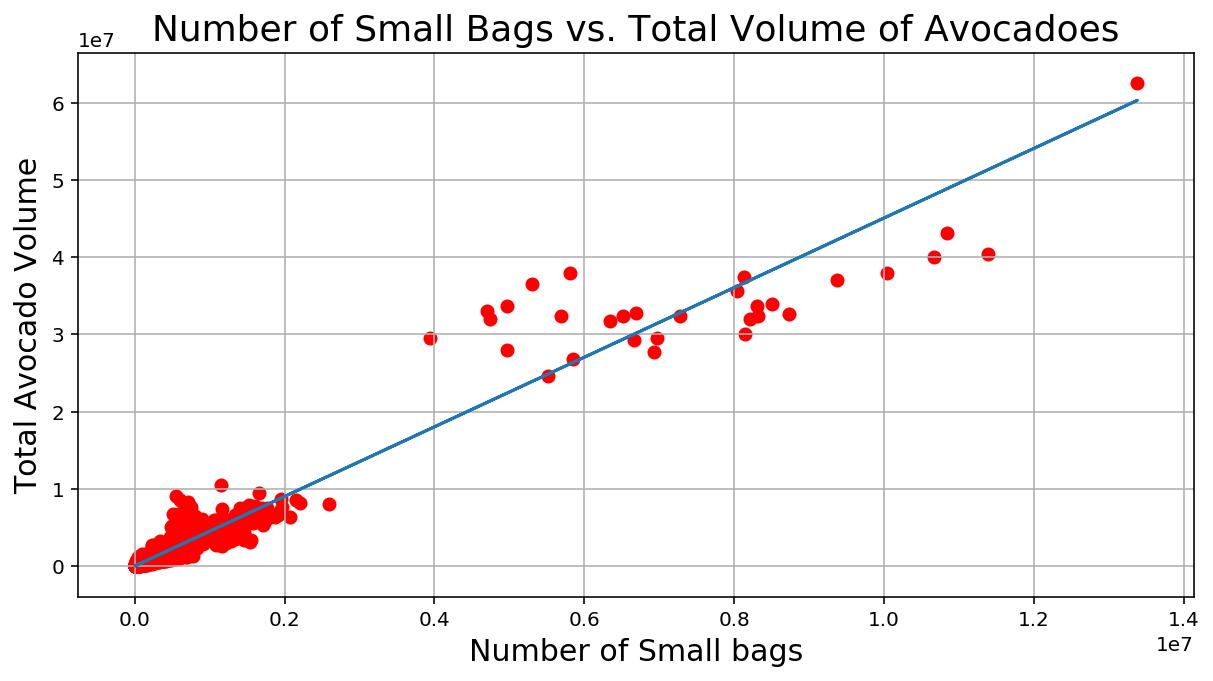

In [15]:
y_predict = linear.predict(x_test)


plt.figure(figsize = (10,5))
plt.plot(x_test, y_predict ,'-') #last parameter determines line type, - is solid, -- is dashed, -o is doted

#plt.subplot(1,1,1) #change size of plot
plt.scatter(x_test, y_test, c = "Red")
plt.title("Number of Small Bags vs. Total Volume of Avocadoes", fontsize = "18")
plt.xlabel("Number of Small bags",fontsize = "15")
plt.ylabel("Total Avocado Volume", fontsize = "15")
plt.grid("on")
plt.show


In [67]:
print(linear.score(x_test,y_test))

0.9299214399040856


In [16]:
MAE = np.mean(abs(y_test - y_predict))
print(MAE)

253912.30951780287


In [17]:
#Imma choose AveragePrice v Total volume
a = avocadoes["AveragePrice"].to_numpy()
b = avocadoes["Total Volume"].to_numpy()

In [18]:
if a.shape[0] != b.shape[0]:
    print("Missing some data")
else:
    print("NVM")

NVM


In [19]:
a_train, b_train = a[train], b[train]
a_test, b_test = a[test], b[test]
a_train = a_train.reshape(-1,1)
b_train = b_train.reshape(-1,1)
a_test = a_test.reshape(-1,1)
b_test = b_test.reshape(-1,1)

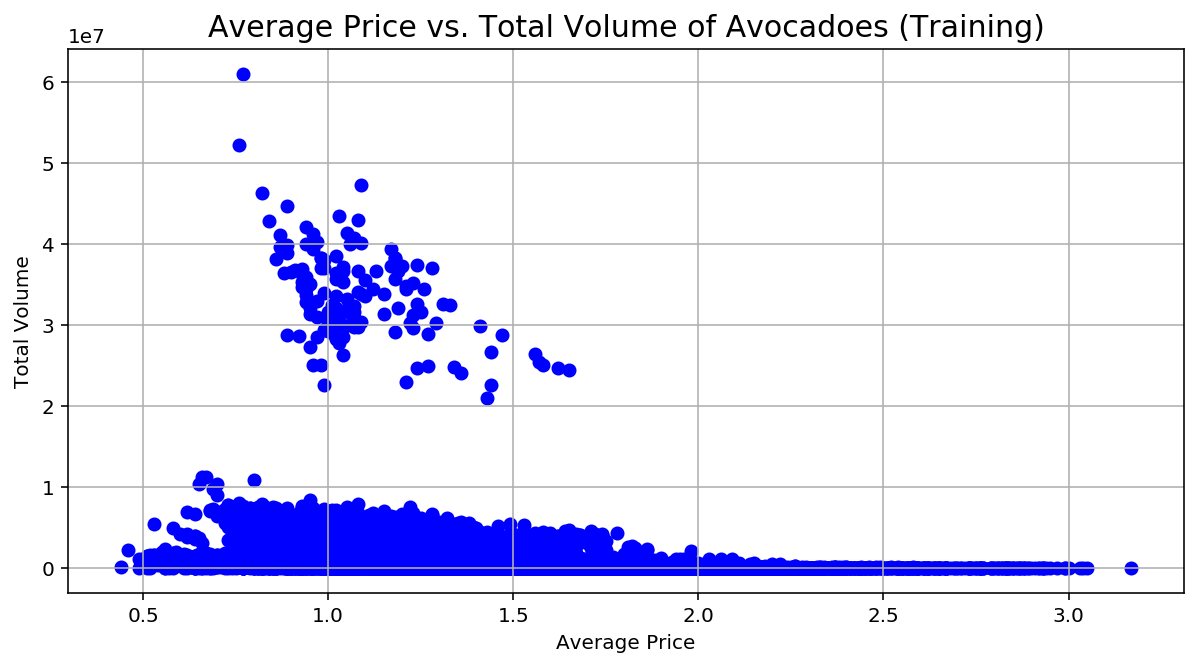

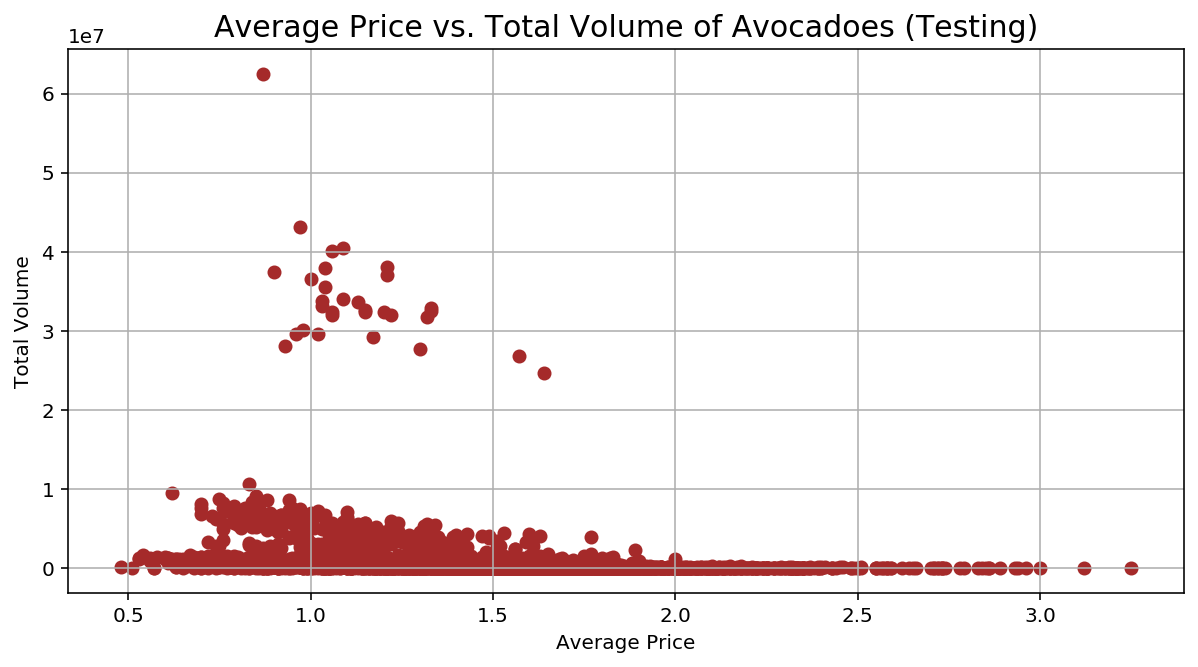

In [20]:
plt.figure(figsize = (10,5))

plt.subplot(1,1,1)
plt.scatter(a_train,b_train,c = "Blue")
plt.title("Average Price vs. Total Volume of Avocadoes (Training)",fontsize = "15")
plt.xlabel("Average Price")
plt.ylabel("Total Volume")
plt.grid("on")

plt.figure(figsize = (10,5))

plt.subplot(1,1,1)
plt.scatter(a_test, b_test,c = "Brown")
plt.title("Average Price vs. Total Volume of Avocadoes (Testing)", fontsize = "15")
plt.xlabel("Average Price")
plt.ylabel("Total Volume")
plt.grid("on")

In [21]:
from sklearn.linear_model import LinearRegression
AI = LinearRegression()
AI.fit(a_train,b_train)
print(AI.intercept_,AI.coef_[0])

[3208275.3307208] [-1674866.82709093]


In [22]:
a_predict = AI.predict(a_test)

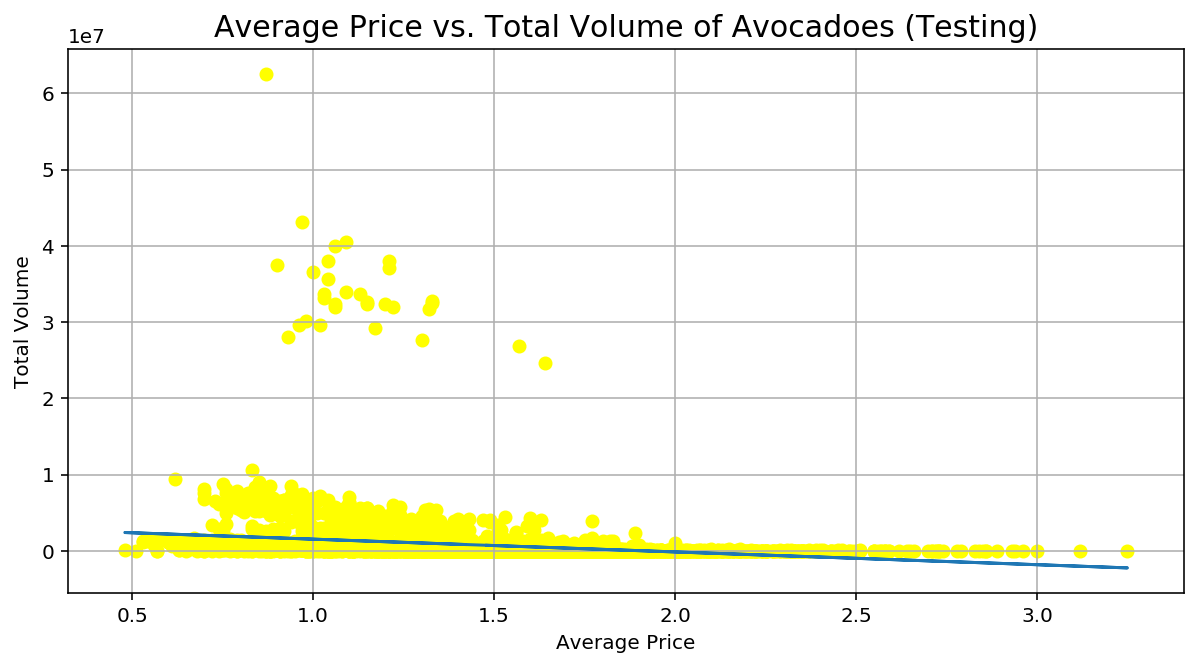

In [23]:
plt.figure(figsize = (10,5))
plt.plot(a_test, a_predict, "-" )

plt.scatter(a_test, b_test, c = "Yellow")
plt.title("Average Price vs. Total Volume of Avocadoes (Testing)", fontsize = "15")
plt.xlabel("Average Price")
plt.ylabel("Total Volume")
plt.grid("on")

In [24]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(a_train, b_train)
Lasso(alpha=1)

#print('R squared training set', round(reg.score(a_train, b_train)*100, 2))
#print('R squared test set', round(reg.score(a_test, b_test)*100, 2))

Lasso(alpha=1)

In [25]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(a_train)
mse_train = mean_squared_error(a_train, b_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(a_test)
mse_test =mean_squared_error(b_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 12758250890544.8
MSE test set 11089724215609.44


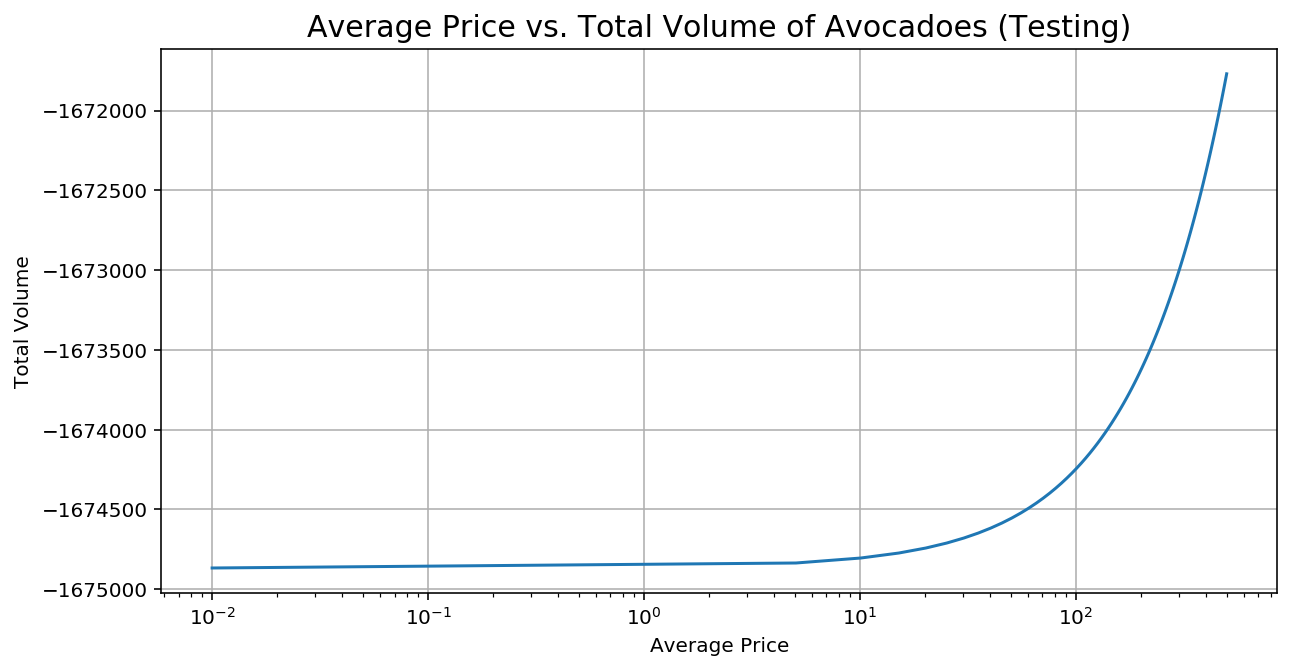

In [28]:
plt.figure(figsize = (10,5))
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(a_train, b_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
plt.xlim(0, 10000)
plt.ylim(0, 100000)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');


plt.scatter(a_test, b_test, c = "Yellow")
plt.title("Average Price vs. Total Volume of Avocadoes (Testing)", fontsize = "15")
plt.xlabel("Average Price")
plt.ylabel("Total Volume")
plt.grid("on")
